In [3]:
import pandas as pd
# load dataset into Pandas DataFrame
df = pd.read_table('nclusters_2/Cluster_2.txt', header=0)#, names=['Counter','IFU','Cluster','<S/N>','R_e','Vel','Spaxels'])

In [6]:
print(df['IFU'])

0      8997-12702
1      8341-12703
2      7962-12701
3      8985-12701
4      8946-12703
          ...    
393    8325-12703
394    8940-12702
395    8588-12704
396    8439-12702
397    8997-12701
Name: IFU, Length: 398, dtype: object


In [8]:
from sklearn.preprocessing import StandardScaler
features = ['<S/N>','R_e','Vel','Spaxels']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Cluster']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [10]:
print(principalDf)

     principal component 1  principal component 2
0                -0.934911               1.098908
1                -1.134011              -0.382019
2                -1.043942              -0.362258
3                -0.350182               2.250395
4                -0.762897               0.135354
..                     ...                    ...
393               0.697627               1.570546
394               4.701747               3.009736
395               4.570995               2.096793
396               1.695793               3.008353
397               2.162669               1.728154

[398 rows x 2 columns]


In [11]:
finalDf = pd.concat([principalDf, df[['Cluster']]], axis = 1)

In [12]:
print(finalDf)

     principal component 1  principal component 2  Cluster
0                -0.934911               1.098908        0
1                -1.134011              -0.382019        0
2                -1.043942              -0.362258        0
3                -0.350182               2.250395        0
4                -0.762897               0.135354        0
..                     ...                    ...      ...
393               0.697627               1.570546        1
394               4.701747               3.009736        1
395               4.570995               2.096793        1
396               1.695793               3.008353        1
397               2.162669               1.728154        1

[398 rows x 3 columns]


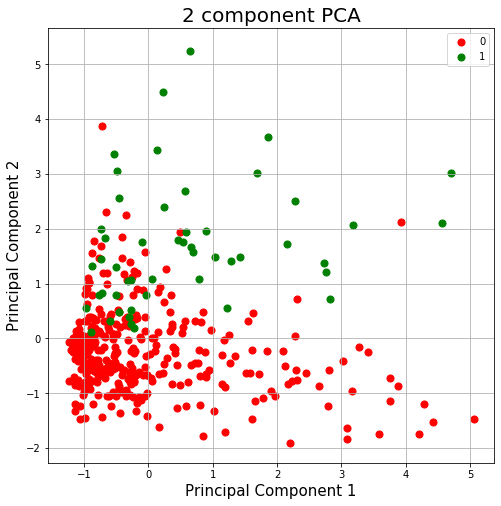

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
#Christmas!

In [18]:
pca.explained_variance_ratio_
#So together, these two components only contain about 60% of the information

array([0.37803944, 0.26728378])

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


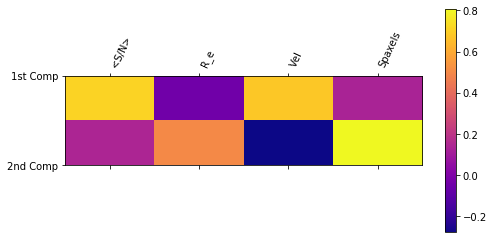

In [22]:
plt.matshow(pca.components_,cmap='plasma')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [23]:
# Actually you might really want to do a logit 
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.539803
         Iterations 6
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.428  
Dependent Variable: y                AIC:              437.6831
Date:               2020-01-28 13:23 BIC:              453.6289
No. Observations:   398              Log-Likelihood:   -214.84 
Df Model:           3                LL-Null:          -150.44 
Df Residuals:       394              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1       1.1803     0.2275    5.1887   0.0000    0.7344    1.6261
x2       0.0976     0.1227    0.7960   0.4260   -0.1428    0.3380
x3      -0.7639  

In [26]:
# Remove everything with a large p value (R_e)
cols=['<S/N>','Vel','Spaxels'] 
X = df.loc[:, cols].values
X = StandardScaler().fit_transform(X)

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.540602
         Iterations 6
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.430  
Dependent Variable: y                AIC:              436.3195
Date:               2020-01-28 13:27 BIC:              448.2788
No. Observations:   398              Log-Likelihood:   -215.16 
Df Model:           2                LL-Null:          -150.44 
Df Residuals:       395              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
x1       1.1812     0.2269    5.2068   0.0000    0.7366    1.6259
x2      -0.7692     0.1776   -4.3318   0.0000   -1.1172   -0.4211
x3       1.2038  

In [ ]:
#It looks like S/N and Spaxels are pretty correlated
#pseudo R^2 is not that high, so there's more going on here too :)